In [1]:
from cProfile import label
import torch
import numpy as np

from farich_functions import *

warnings.filterwarnings("ignore")


def enforce_float32(df):
    return df.astype({col: np.float32 for col in df.select_dtypes(include=['float64']).columns})


idf = pd.DataFrame()
idf['W'] = [35.]
# idf['W'] = [40.]

idf['zdis'] = [800.]
idf['distance'] = [205.]  # 200
idf['n_mean'] = [1.04511]
# 
# idf['n_mean'] = [1.0502]

idf['pixel_size'] = [3.16]
mu_mass = 105.65
pi_mass = 139.57
ka_mass = 493.68

In [2]:
edf, bdf, gdf = create_edf('fullsim_optical_2000_pi_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None,
                           uncertain_angle=False, is_mu=False, num_of_files=11)

(21988, 5)
(21988, 3)
(21864, 5)
(21864, 3)


In [3]:
edf

x_c     y_c       t_c        x_i         y_i     z_c  \
entry subentry                                                               
0     0         89.440131  115.36  0.668623  71.239201  102.379707  1000.0   
      1         96.160131  112.00  0.617086  71.239201  102.379707  1000.0   
      2         79.360131  125.44  0.639925  71.239201  102.379707  1000.0   
      3         42.400131  105.28  0.590146  71.239201  102.379707  1000.0   
      4         45.760131  101.92  0.573616  71.239201  102.379707  1000.0   
...                   ...     ...       ...        ...         ...     ...   
21863 44        32.320131  622.72  0.594467  75.151100  664.462287  1000.0   
      45        62.560131  605.92  0.570020  75.151100  664.462287  1000.0   
      46        12.160131  659.68  0.684080  75.151100  664.462287  1000.0   
      47        25.600131  629.44  0.608963  75.151100  664.462287  1000.0   
      48        18.880131  736.96  0.842494  75.151100  664.462287  1000.0   

                  mass       true_p      beta  x_p  y_p  z_p      nx_p  \
entry subentry                                                           
0     0         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      1         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      2         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      3         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      4         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
...                ...          ...       ...  ...  ...  ...       ...   
21863 44        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      45        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      46        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      47        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      48        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   

                    ny_p      nz_p  
entry subentry                      
0     0         0.101593  0.992311  
      1         0.101593  0.992311  
      2         0.101593  0.992311  
      3         0.101593  0.992311  
      4         0.101593  0.992311  
...                  ...       ...  
21863 44        0.552347  0.831270  
      45        0.552347  0.831270  
      46        0.552347  0.831270  
      47        0.552347  0.831270  
      48        0.552347  0.831270  

[660903 rows x 15 columns]

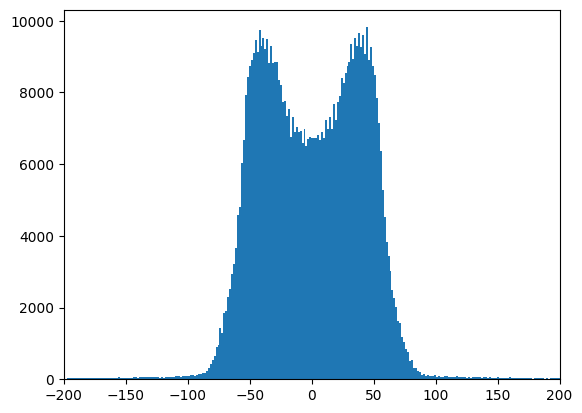

In [4]:
plt.hist(edf.x_c - edf.x_i, bins='auto')
plt.xlim((-200, 200))
plt.show()

In [5]:
300 / SIPM_CELL_SIZE

89.28571428571429

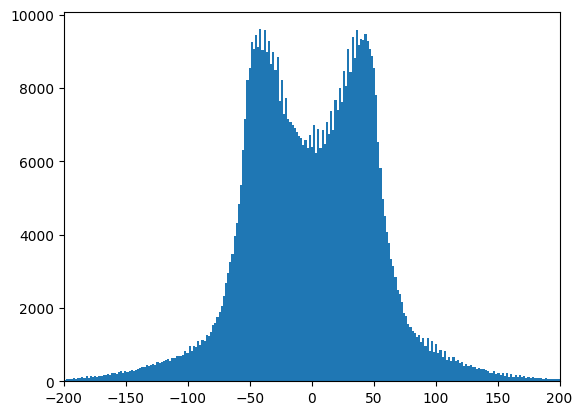

In [6]:
plt.hist(edf.y_c - edf.y_i, bins='auto')
plt.xlim((-200, 200))
plt.show()

In [7]:
440 / SIPM_CELL_SIZE

130.95238095238096

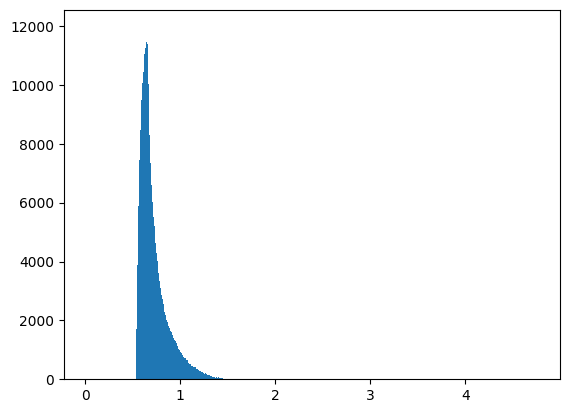

In [8]:
plt.hist(edf.t_c, bins='auto')
plt.show()

In [9]:
edf['x_s'] = np.array((edf.x_c - edf.x_i) / SIPM_CELL_SIZE, dtype=int)
edf['y_s'] = np.array((edf.y_c - edf.y_i) / SIPM_CELL_SIZE, dtype=int)

In [10]:
edf

x_c     y_c       t_c        x_i         y_i     z_c  \
entry subentry                                                               
0     0         89.440131  115.36  0.668623  71.239201  102.379707  1000.0   
      1         96.160131  112.00  0.617086  71.239201  102.379707  1000.0   
      2         79.360131  125.44  0.639925  71.239201  102.379707  1000.0   
      3         42.400131  105.28  0.590146  71.239201  102.379707  1000.0   
      4         45.760131  101.92  0.573616  71.239201  102.379707  1000.0   
...                   ...     ...       ...        ...         ...     ...   
21863 44        32.320131  622.72  0.594467  75.151100  664.462287  1000.0   
      45        62.560131  605.92  0.570020  75.151100  664.462287  1000.0   
      46        12.160131  659.68  0.684080  75.151100  664.462287  1000.0   
      47        25.600131  629.44  0.608963  75.151100  664.462287  1000.0   
      48        18.880131  736.96  0.842494  75.151100  664.462287  1000.0   

                  mass       true_p      beta  x_p  y_p  z_p      nx_p  \
entry subentry                                                           
0     0         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      1         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      2         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      3         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      4         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
...                ...          ...       ...  ...  ...  ...       ...   
21863 44        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      45        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      46        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      47        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      48        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   

                    ny_p      nz_p  x_s  y_s  
entry subentry                                
0     0         0.101593  0.992311    5    3  
      1         0.101593  0.992311    7    2  
      2         0.101593  0.992311    2    6  
      3         0.101593  0.992311   -8    0  
      4         0.101593  0.992311   -7    0  
...                  ...       ...  ...  ...  
21863 44        0.552347  0.831270  -12  -12  
      45        0.552347  0.831270   -3  -17  
      46        0.552347  0.831270  -18   -1  
      47        0.552347  0.831270  -14  -10  
      48        0.552347  0.831270  -16   21  

[660903 rows x 17 columns]

In [11]:
edf_c = edf[(np.abs(edf.x_s) < 65) & (np.abs(edf.y_s) < 65)]

In [12]:
edf_c

x_c     y_c       t_c        x_i         y_i     z_c  \
entry subentry                                                               
0     0         89.440131  115.36  0.668623  71.239201  102.379707  1000.0   
      1         96.160131  112.00  0.617086  71.239201  102.379707  1000.0   
      2         79.360131  125.44  0.639925  71.239201  102.379707  1000.0   
      3         42.400131  105.28  0.590146  71.239201  102.379707  1000.0   
      4         45.760131  101.92  0.573616  71.239201  102.379707  1000.0   
...                   ...     ...       ...        ...         ...     ...   
21863 44        32.320131  622.72  0.594467  75.151100  664.462287  1000.0   
      45        62.560131  605.92  0.570020  75.151100  664.462287  1000.0   
      46        12.160131  659.68  0.684080  75.151100  664.462287  1000.0   
      47        25.600131  629.44  0.608963  75.151100  664.462287  1000.0   
      48        18.880131  736.96  0.842494  75.151100  664.462287  1000.0   

                  mass       true_p      beta  x_p  y_p  z_p      nx_p  \
entry subentry                                                           
0     0         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      1         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      2         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      3         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
      4         139.57   522.711615  0.966152  0.0  0.0  0.0  0.070691   
...                ...          ...       ...  ...  ...  ...       ...   
21863 44        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      45        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      46        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      47        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   
      48        139.57  1615.806533  0.996290  0.0  0.0  0.0  0.062471   

                    ny_p      nz_p  x_s  y_s  
entry subentry                                
0     0         0.101593  0.992311    5    3  
      1         0.101593  0.992311    7    2  
      2         0.101593  0.992311    2    6  
      3         0.101593  0.992311   -8    0  
      4         0.101593  0.992311   -7    0  
...                  ...       ...  ...  ...  
21863 44        0.552347  0.831270  -12  -12  
      45        0.552347  0.831270   -3  -17  
      46        0.552347  0.831270  -18   -1  
      47        0.552347  0.831270  -14  -10  
      48        0.552347  0.831270  -16   21  

[656074 rows x 17 columns]

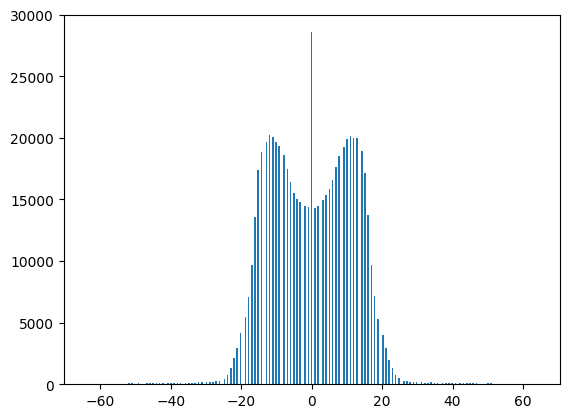

In [13]:
plt.hist(edf_c.x_s, bins='auto')
plt.show()

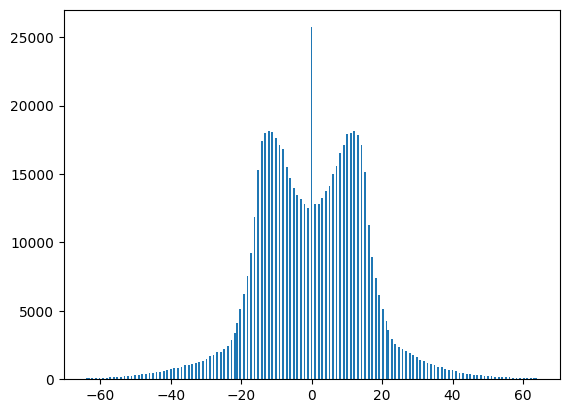

In [14]:
plt.hist(edf_c.y_s, bins='auto')
plt.show()

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [57]:
edf_c.loc[1, ['x_s', 'y_s']]

,x_s,y_s
subentry,,
0,-3,-5
1,-4,2
2,-1,-8
3,-7,0
4,9,-1
5,-6,-8
6,10,-2
7,4,7
8,-6,7


In [76]:
class BinaryImageDataset(Dataset):
    def __init__(self, dataframe, image_size=130):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame with columns 'x_s' and 'y_s' representing pixel coordinates.
            image_size (int): Size of the binary image (assumes square images).
        """
        self.dataframe = dataframe
        self.image_ids = dataframe.index.get_level_values(0).unique()  # Assuming each image has a unique first-level index
        self.image_size = image_size

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        
        # Get all pixel coordinates for the current image
        pixels = self.dataframe.loc[image_id, ['x_s', 'y_s']].to_numpy()
        # print(image_id)
        # print(pixels)
        if isinstance(pixels, pd.Series):
            pixels = pixels.to_frame().T  # Convert to DataFrame and transpose if a single row
        # print(pixels)
        
        # Map coordinates from [-65, +65] to [0, 129]
        pixels_mapped = pixels + 65
        
        # Create a blank binary image
        image = np.zeros((self.image_size, self.image_size), dtype=np.float32)
        # print(pixels_mapped)
        # Set activated pixels to 1
        for x, y in pixels_mapped:
            image[x, y] = 1.0
        
        return image

In [77]:
dataset = BinaryImageDataset(dataframe=edf_c)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [78]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 4096),
            nn.ReLU(),
            nn.Linear(4096, 130 * 130),
            nn.Sigmoid()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(-1, 1, 130, 130)  # Reshape to image size

In [79]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(130 * 130, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability of being real
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)  # Flatten image
        return self.model(img_flat)


In [80]:
latent_dim = 100
generator = Generator(latent_dim)
discriminator = Discriminator()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
generator.to(device)
discriminator.to(device)

# Optimizers
lr = 0.0002
beta1, beta2 = 0.5, 0.999
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

# Loss function
adversarial_loss = nn.BCELoss()


In [81]:
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    for real_imgs in dataloader:
        real_imgs = real_imgs.to(device)

        # Create real and fake labels
        real_labels = torch.ones((real_imgs.size(0), 1), device=device)
        fake_labels = torch.zeros((real_imgs.size(0), 1), device=device)

        # ------------------
        # Train Discriminator
        # ------------------
        optimizer_D.zero_grad()

        # Real loss
        real_loss = adversarial_loss(discriminator(real_imgs), real_labels)

        # Fake loss
        z = torch.randn(real_imgs.size(0), latent_dim, device=device)
        fake_imgs = generator(z)
        fake_loss = adversarial_loss(discriminator(fake_imgs.detach()), fake_labels)

        # Total loss and backprop
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # ------------------
        # Train Generator
        # ------------------
        optimizer_G.zero_grad()

        # Generator loss
        g_loss = adversarial_loss(discriminator(fake_imgs), real_labels)
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")


Epoch [1/10000]  D Loss: 0.0204  G Loss: 73.2634
Epoch [2/10000]  D Loss: 0.0021  G Loss: 71.3813
Epoch [3/10000]  D Loss: 0.0008  G Loss: 70.3585
Epoch [4/10000]  D Loss: 0.0023  G Loss: 69.4763
Epoch [5/10000]  D Loss: 0.0003  G Loss: 68.5102
Epoch [6/10000]  D Loss: 0.0000  G Loss: 67.9319
Epoch [7/10000]  D Loss: 0.0002  G Loss: 67.2595
Epoch [8/10000]  D Loss: 0.0000  G Loss: 66.7424
Epoch [9/10000]  D Loss: 0.0001  G Loss: 66.0954
Epoch [10/10000]  D Loss: 0.0001  G Loss: 65.7477
Epoch [11/10000]  D Loss: 0.0000  G Loss: 65.2573
Epoch [12/10000]  D Loss: 0.0000  G Loss: 64.8807
Epoch [13/10000]  D Loss: 0.0000  G Loss: 64.5413
Epoch [14/10000]  D Loss: 0.0000  G Loss: 63.7488
Epoch [15/10000]  D Loss: 0.0000  G Loss: 63.4491
Epoch [16/10000]  D Loss: 0.0000  G Loss: 63.2279
Epoch [17/10000]  D Loss: 0.0000  G Loss: 62.3913
Epoch [18/10000]  D Loss: 0.0000  G Loss: 61.7305


KeyboardInterrupt: 

In [18]:
class SparseImageDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.image_ids = dataframe.index.get_level_values(0).unique()

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        pixels = self.dataframe.loc[image_id, ['x_s', 'y_s']].to_numpy()
        return torch.tensor(pixels, dtype=torch.float32)

In [19]:
def sparse_collate_fn(batch):
    """
    Custom collate function to pad variable-length coordinate sets.

    Args:
        batch (list of Tensors): Each tensor is of shape (num_pixels, 2).
    
    Returns:
        padded_coords (Tensor): Padded coordinate sets of shape (batch_size, max_num_pixels, 2).
        lengths (Tensor): Original lengths of each coordinate set.
    """
    lengths = torch.tensor([coords.size(0) for coords in batch])  # Original lengths
    max_length = lengths.max().item()  # Maximum length in the batch
    
    # Create padded tensor of shape (batch_size, max_length, 2)
    padded_coords = torch.zeros((len(batch), max_length, 2), dtype=torch.float32)
    
    for i, coords in enumerate(batch):
        padded_coords[i, :lengths[i]] = coords  # Copy coordinates and pad the rest with zeros
    
    return padded_coords, lengths

In [22]:
# Assuming 'df' is your dataframe with multi-index and columns ['x_s', 'y_s']
dataset = SparseImageDataset(edf_c)

# Create DataLoader with custom collate function
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=sparse_collate_fn)



In [23]:
class SparseGenerator(nn.Module):
    def __init__(self, latent_dim, num_pixels):
        super(SparseGenerator, self).__init__()
        self.latent_dim = latent_dim
        self.num_pixels = num_pixels  # Number of activated pixels to generate
        
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, num_pixels * 2)  # Output (x, y) pairs
        )

    def forward(self, z):
        coords = self.fc(z)
        coords = coords.view(-1, self.num_pixels, 2)  # Reshape to (batch, num_pixels, 2)
        coords = torch.tanh(coords) * 65  # Scale to range [-65, +65]
        return coords



In [24]:
class SparseDiscriminator(nn.Module):
    def __init__(self, hidden_dim=256):
        super(SparseDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, coords, lengths):
        """
        Args:
            coords (Tensor): Padded coordinate sets of shape (batch_size, max_num_pixels, 2).
            lengths (Tensor): Lengths of each coordinate set.
        """
        batch_size, max_length, _ = coords.size()
        flat_coords = coords.view(-1, 2)  # Flatten to (batch_size * max_length, 2)
        
        # Process all coordinates through the model
        validity = self.model(flat_coords).view(batch_size, max_length)
        
        # Create a mask to ignore padded values
        mask = torch.arange(max_length).unsqueeze(0).repeat(batch_size, 1).cuda()
        mask = (mask < lengths.unsqueeze(1)).float()  # 1 where valid, 0 where padded
        
        # Apply mask and average validity over valid pixels
        masked_validity = validity * mask
        validity_per_image = masked_validity.sum(dim=1) / lengths.float()
        
        return validity_per_image

In [26]:
import torch.optim as optim

# Hyperparameters
epochs = 10000
latent_dim = 100
num_pixels = 150  # Adjust based on your data
batch_size = 64
lr = 0.0002

# Initialize models
generator = SparseGenerator(latent_dim, num_pixels).cuda()
discriminator = SparseDiscriminator(latent_dim).cuda()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Loss
adversarial_loss = nn.BCELoss()

for epoch in range(epochs):
    for i, (real_coords, lengths) in enumerate(dataloader):
        real_coords, lengths = real_coords.cuda(), lengths.cuda()

        # Train Discriminator
        optimizer_D.zero_grad()
        
        # Real data
        real_validity = discriminator(real_coords, lengths)
        real_labels = torch.ones((real_coords.size(0), 1)).cuda().squeeze()
        d_real_loss = adversarial_loss(real_validity, real_labels)
        
        # Fake data
        z = torch.randn(real_coords.size(0), latent_dim).cuda()
        fake_coords = generator(z)
        fake_lengths = torch.full((real_coords.size(0),), num_pixels).cuda()  # All fake sets have num_pixels
        
        fake_validity = discriminator(fake_coords, fake_lengths)
        fake_labels = torch.zeros((real_coords.size(0), 1)).cuda().squeeze()
        d_fake_loss = adversarial_loss(fake_validity, fake_labels)
        
        # Total discriminator loss
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward(retain_graph=True)  # Retain the graph for the generator backward pass
        optimizer_D.step()
        
        # Train Generator
        optimizer_G.zero_grad()
        
        fake_validity = discriminator(fake_coords, fake_lengths)
        g_loss = adversarial_loss(fake_validity, real_labels)
        g_loss.backward()  # Now the graph is retained, so we can backpropagate for the generator
        optimizer_G.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

Epoch [0/10000] Batch 0, D Loss: 1.832671880722046, G Loss: 1.0402464866638184
Epoch [0/10000] Batch 100, D Loss: 1.3399641513824463, G Loss: 0.871056079864502
Epoch [0/10000] Batch 200, D Loss: 1.470534324645996, G Loss: 0.6957976222038269
Epoch [0/10000] Batch 300, D Loss: 1.6944940090179443, G Loss: 0.45542630553245544
Epoch [1/10000] Batch 0, D Loss: 1.500002384185791, G Loss: 0.6354241967201233
Epoch [1/10000] Batch 100, D Loss: 1.3783658742904663, G Loss: 0.6553231477737427
Epoch [1/10000] Batch 200, D Loss: 1.4435793161392212, G Loss: 0.6689199805259705
Epoch [1/10000] Batch 300, D Loss: 1.44451904296875, G Loss: 0.6522355079650879
Epoch [2/10000] Batch 0, D Loss: 1.4014755487442017, G Loss: 0.6912693977355957
Epoch [2/10000] Batch 100, D Loss: 1.3862881660461426, G Loss: 0.6960849761962891
Epoch [2/10000] Batch 200, D Loss: 1.4087927341461182, G Loss: 0.7236218452453613
Epoch [2/10000] Batch 300, D Loss: 1.4310028553009033, G Loss: 0.6465438604354858
Epoch [3/10000] Batch 0, D 

KeyboardInterrupt: 

In [ ]:
train_sparse_gan(edf_c)

In [ ]:
edf_c

In [ ]:
gdf.nhits.max()